In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [17]:

# Load dataset
df = pd.read_csv("../Data/The_Cancer_data_1500_V2.csv")

# Replace Gender codes with labels for better understanding
# df['Gender'] = df['Gender'].replace({0: 'Male', 1: 'Female'})

# Step 1: Column Information and Data Types
print("Column Information and Data Types:")
print(df.info())

# Step 3: Missing Values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Save EDA text report
with open("../Data/EDA_Report.txt", "w") as file:
    file.write("Column Information and Data Types:\n")
    file.write(str(df.dtypes) + "\n\n")
    file.write("Summary Statistics:\n")
    file.write(df.describe().to_string() + "\n\n")
    file.write("Missing Values Count:\n")
    file.write(df.isnull().sum().to_string() + "\n\n")

Column Information and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB
None

Missing Values Count:
Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64


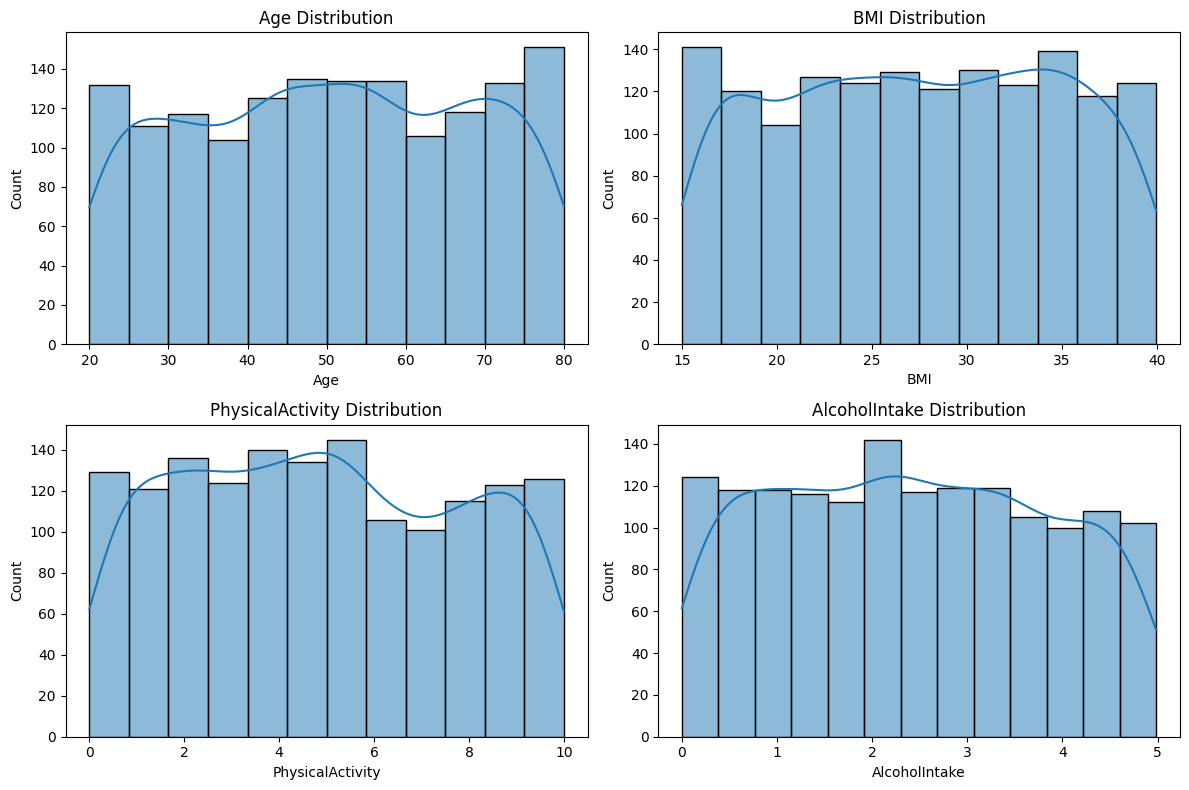

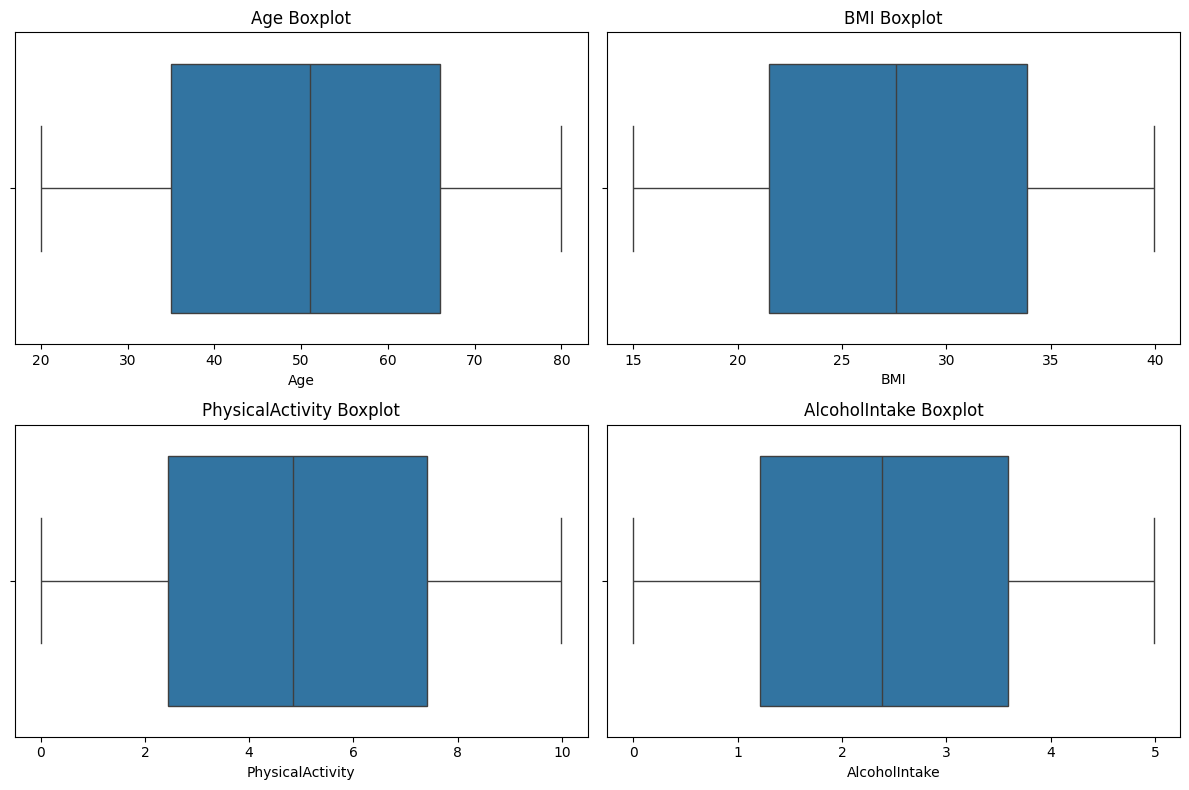

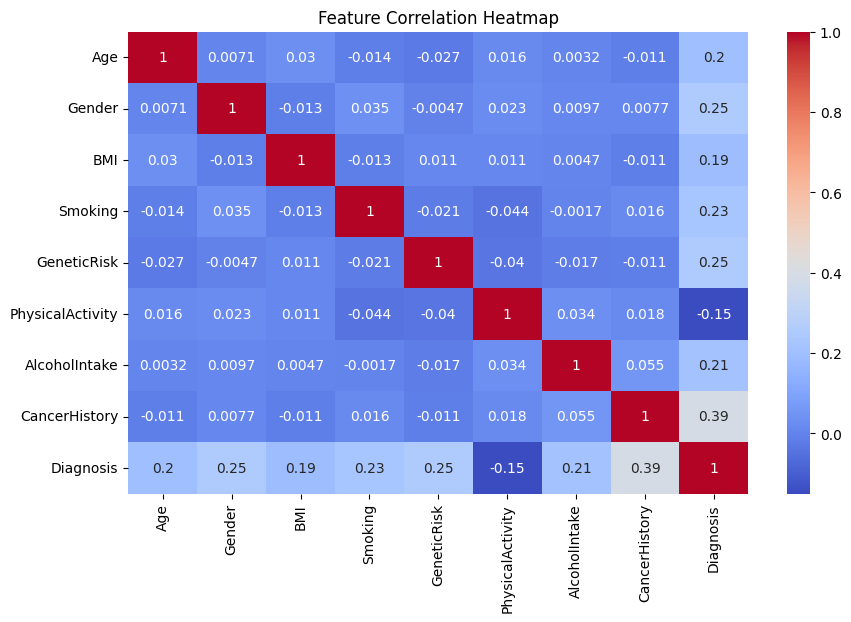


 EDA Completed - Reports and Visualizations Saved!


In [18]:
# Step 4: Visualization - Numerical Feature Distributions
numerical_columns = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.savefig("../Data/eda_numerical_distributions.png")
plt.show()

# Step 5: Boxplots (Outlier Detection)
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'{column} Boxplot')
plt.tight_layout()
plt.savefig("../Data/eda_boxplots.png")
plt.show()

# Step 6: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.savefig("../Data/eda_correlation_heatmap.png")
plt.show()

print("\n EDA Completed - Reports and Visualizations Saved!")

# Create processed dataset and save
df.to_csv("../Data/The_Cancer_data_1500_V2_Processed.csv", index=False)

In [19]:

# Step 7: Handle Missing Values
# Replace missing values with the mean for numerical columns
df.fillna(df.mean(), inplace=True)

# Step 8: Encode Categorical Variables
# Convert 'Gender' column values to numerical format if applicable
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

# Step 9: Scale Numerical Features
# Define numerical columns to scale
numerical_columns = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']

# Apply scaling only if the columns exist
scaler = StandardScaler()
for col in numerical_columns:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

# Step 10: Handle Outliers
# Cap extreme values for numerical columns at 5th and 95th percentiles
for col in numerical_columns:
    if col in df.columns:
        lower_bound = df[col].quantile(0.05)
        upper_bound = df[col].quantile(0.95)
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Step 11: Save Cleaned Dataset
cleaned_output_path = "../Data/The_Cancer_data_1500_V3_Processed.csv"
df.to_csv(cleaned_output_path, index=False)
print(f"Cleaned dataset saved to {cleaned_output_path}.")


Cleaned dataset saved to ../Data/The_Cancer_data_1500_V3_Processed.csv.
